In [65]:
# N = 20
# 1) logistic regression
# 2) 20 % 2 + 1 = 1 -> SVM
# 3) decision tree

In [66]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import check_random_state
from sklearn.svm import SVC

In [67]:
# https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-mat.csv
data = pd.read_csv('adult.csv')

In [68]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [69]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [70]:
len(data)

48842

In [71]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [72]:
MATCH = {
    'Private': 2,
    'Self-emp-not-inc': 3,
    'Local-gov': 4,
    '?': 5,
    'State-gov': 6,
    'Self-emp-inc ': 7
}

RELATIONS = {
    'Husband': 6,
    'Not-in-family': 5,
    'Own-child': 4,
    'Unmarried': 3,
    'Wife': 2,
    'Other-relative': 1
}


def change_workclass(string):
    if string in MATCH:
        return MATCH[string]
    
    return 1

def change_rase(string):
    if string == 'Black':
        return 0
    
    return 1

def change_income(string):
    if string == '>50K':
        return 1
    
    return 0

def change_relationship(string):
    return RELATIONS[string]

data['workclass'] = data['workclass'].apply(change_workclass)
data['race'] = data['race'].apply(change_rase)
data['income'] = data['income'].apply(change_income)
data['relationship'] = data['relationship'].apply(change_relationship)

data = data.drop(columns=['occupation', 'native-country', 'education', 'marital-status'])

In [73]:
data.corr()

,age,workclass,fnlwgt,educational-num,relationship,race,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.060108,-0.076628,0.030940,0.233965,0.017324,0.077229,0.056944,0.071558,0.230369
workclass,0.060108,1.000000,-0.017731,0.048031,-0.035342,-0.025025,-0.031033,-0.008435,-0.114233,-0.051015
fnlwgt,-0.076628,-0.017731,1.000000,-0.038761,-0.016904,-0.125910,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,0.048031,-0.038761,1.000000,0.105458,0.074364,0.125146,0.080972,0.143689,0.332613
relationship,0.233965,-0.035342,-0.016904,0.105458,1.000000,0.137735,0.056647,0.055299,0.227777,0.257369
race,0.017324,-0.025025,-0.125910,0.074364,0.137735,1.000000,0.021456,0.020956,0.047961,0.090448
capital-gain,0.077229,-0.031033,-0.003706,0.125146,0.056647,0.021456,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.008435,-0.004366,0.080972,0.055299,0.020956,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.114233,-0.013519,0.143689,0.227777,0.047961,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.051015,-0.006339,0.332613,0.257369,0.090448,0.223013,0.147554,0.227687,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

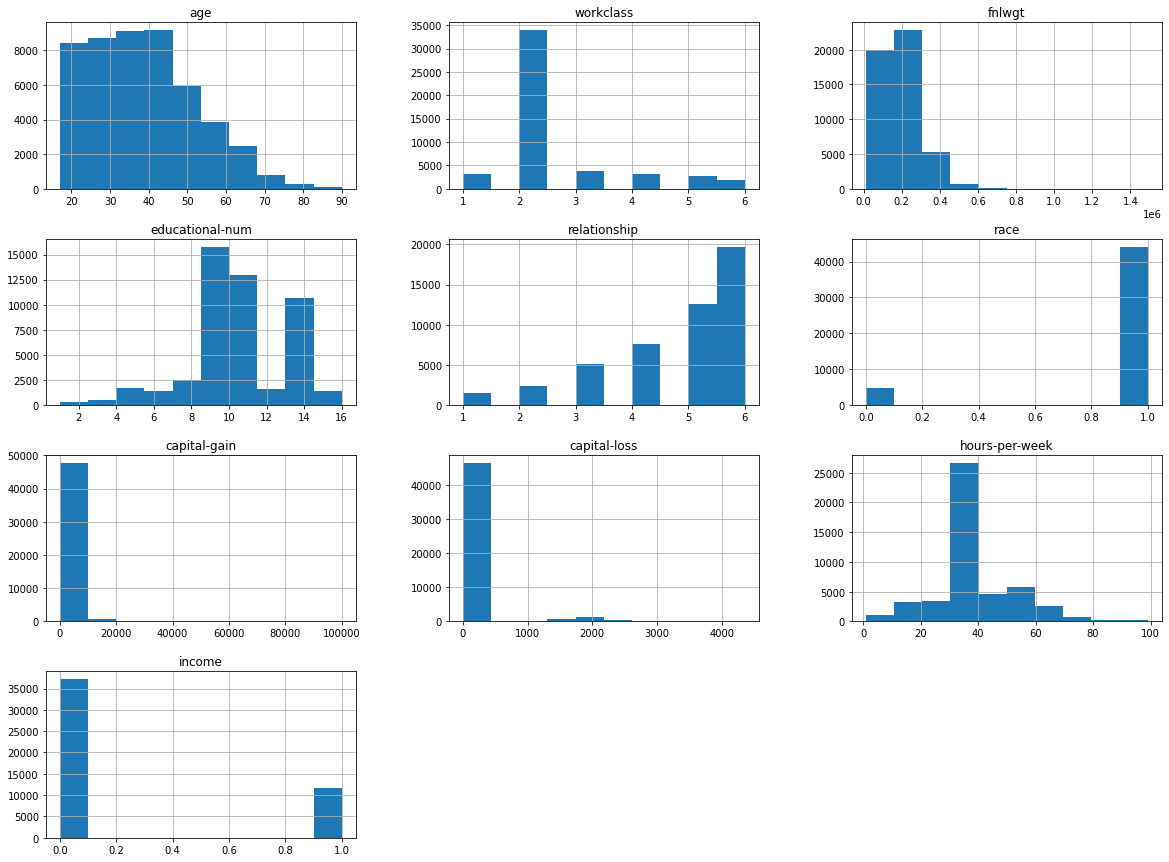

In [74]:
data.hist(figsize=(20, 15))

In [75]:
def change_gender(string):
    if string == 'Male':
        return 1

    return 0

def to_long_float(num):
    return np.float128(num)

for col in data.columns:
    if col != 'gender':
        data[col] = data[col].apply(to_long_float)

designs, targets = data.drop(columns=['gender']).to_numpy(), np.array(data['gender'].apply(change_gender))

print(designs)
print(targets)

[[2.50000e+01 2.00000e+00 2.26802e+05 ... 0.00000e+00 4.00000e+01
  0.00000e+00]
 [3.80000e+01 2.00000e+00 8.98140e+04 ... 0.00000e+00 5.00000e+01
  0.00000e+00]
 [2.80000e+01 4.00000e+00 3.36951e+05 ... 0.00000e+00 4.00000e+01
  1.00000e+00]
 ...
 [5.80000e+01 2.00000e+00 1.51910e+05 ... 0.00000e+00 4.00000e+01
  0.00000e+00]
 [2.20000e+01 2.00000e+00 2.01490e+05 ... 0.00000e+00 2.00000e+01
  0.00000e+00]
 [5.20000e+01 1.00000e+00 2.87927e+05 ... 0.00000e+00 4.00000e+01
  1.00000e+00]]
[1 1 1 ... 0 1 0]


In [76]:
designs_train, designs_test, targets_train, targets_test = train_test_split(designs, targets, test_size=0.2, random_state=25)

In [77]:
# 1) logistic regression
lgr = LogisticRegression()
lgr.fit(designs_train, targets_train)
print('Train score: {}'.format(lgr.score(designs_train, targets_train)))
print('Test score: {}'.format(lgr.score(designs_test, targets_test)))

Train score: 0.6675965500473473
Test score: 0.6722284778380592


In [87]:
from copy import deepcopy

def logit_function(param):
    return 1 / (1 + np.exp(-param))


class LogisticRegression:
    def __init__(self, step=0.1, iterations_count=10 ** 4):
        self.step = step
        self.iterations_count = iterations_count

    def add_coefs(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))

    def score(self, features, target):
        cnt = 0
        for i in range(target.shape[0]):
            coefs = self.add_coefs(np.array([deepcopy(features[i])]))
            if logit_function(np.dot(coefs, self.weights)).round() == target[i]:
                cnt += 1
        return cnt / target.shape[0]

    def fit(self, x, y):
        X = self.add_coefs(deepcopy(x))
        self.weights = np.zeros(X.shape[1])

        for i in range(self.iterations_count):
            z = np.dot(X, self.weights)
            grad = np.dot(X.T, logit_function(z) - y) / y.size
            self.weights -= self.step * grad

In [88]:
lgr = LogisticRegression()
lgr.fit(designs_train, targets_train)
print('Train score: {}'.format(lgr.score(designs_train, targets_train)))
print('Test score: {}'.format(lgr.score(designs_test, targets_test)))

/home/fefso/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Train score: 0.6675453638062089
Test score: 0.6722284778380592


In [24]:
# 2) SVM
svc = SVC(decision_function_shape='ovr')
svc.fit(designs_train, targets_train)
print('Train score: {}'.format(svc.score(designs_train, targets_train)))
print('Test score: {}'.format(svc.score(designs_test, targets_test)))

Train score: 0.6675965500473473
Test score: 0.6720237485924865


In [90]:
def projection_simplex(v, z=1):
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w

class SVM:
    def __init__(self, C=1, max_iter=100, eps=0.01, random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.eps = eps
        self.random_state = random_state
        self.verbose = verbose

    def partial_gradient(self,f, t, i):
        g = np.dot(f[i], self.coef.T) + 1
        g[int(t[i])] -= 1
        return g

    def violation(self, g, t, i):
        smallest = np.inf
        for k in range(g.shape[0]):
            if k == t[i] and self.dual_coef[k, i] >= self.C:
                continue
            elif k != t[i] and self.dual_coef[k, i] >= 0:
                continue

            smallest = min(smallest, g[k])
        return g.max() - smallest

    def solver(self, g, t, norms, i):
        Ci = np.zeros(g.shape[0])
        Ci[int(t[i])] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef[:, i]) + g / norms[i]
        z = self.C * norms[i]
        beta = projection_simplex(beta_hat, z)
        return Ci - self.dual_coef[:, i] - beta / norms[i]

    def fit(self,f, t):
        n_samples, n_features =f.shape
        n_classes = 4
        self.dual_coef = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef = np.zeros((n_classes, n_features))
        norms = np.sqrt(np.sum(f ** 2, axis=1))
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)
        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0
            for idx in range(n_samples):
                i = ind[idx]

                if norms[i] == 0:
                    continue
                g = self.partial_gradient(f, t, i)
                v = self.violation(g, t, i)
                violation_sum += v
                if v < 1e-12:
                    continue
                delta = self.solver(g, t, norms, i)
                self.coef += (delta *f[i][:, np.newaxis]).T
                self.dual_coef[:, i] += delta
            if it == 0:
                violation_init = violation_sum
            vratio = violation_sum / violation_init
            if self.verbose >= 1:
                print("iter", it + 1, "violation", vratio)
            if vratio < self.eps:
                if self.verbose >= 1:
                    print("Converged")
                break
        return self

    def predict(self,f):
        decision = np.dot(f, self.coef.T)
        pred = decision.argmax(axis=0)
        return pred

    def score(self, features, target):
        cnt = 0
        for i in range(target.shape[0]):
            if self.predict(features[i]) == target[i]:
                cnt += 1
        return cnt / target.shape[0]

In [91]:
svm = SVM()
svm.fit(designs_train, targets_train)
print('Train score: {}'.format(svc.score(designs_train, targets_train)))
print('Test score: {}'.format(svc.score(designs_test, targets_test)))

Train score: 0.6675965500473473
Test score: 0.6720237485924865


In [30]:
# 3) decision tree
for depth in range(1, 15):
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(designs_train, targets_train)
    print('Depth = {}'.format(depth))
    print('Train score: {}'.format(dtc.score(designs_train, targets_train)))
    print('Test score: {}'.format(dtc.score(designs_test, targets_test)))

Depth = 1
Train score: 0.737516955442377
Test score: 0.7256628109325417
Depth = 2
Train score: 0.7697642873595577
Test score: 0.7678370355205241
Depth = 3
Train score: 0.7920303022547539
Test score: 0.7886170539461562
Depth = 4
Train score: 0.7965858777160699
Test score: 0.7871839492271471
Depth = 5
Train score: 0.803035344099506
Test score: 0.7903572525335244
Depth = 6
Train score: 0.8059017736032554
Test score: 0.7941447435766199
Depth = 7
Train score: 0.80892176183042
Test score: 0.7958849421639881
Depth = 8
Train score: 0.8154224144549945
Test score: 0.7945542020677654
Depth = 9
Train score: 0.819901210554603
Test score: 0.7956802129184154
Depth = 10
Train score: 0.8265042356614543
Test score: 0.7945542020677654
Depth = 11
Train score: 0.8336191231796893
Test score: 0.7930187327259699
Depth = 12
Train score: 0.8413482455915849
Test score: 0.7928140034803972
Depth = 13
Train score: 0.8509200726844625
Test score: 0.7920974511208926
Depth = 14
Train score: 0.8609781690681545
Test scor

In [97]:

class DescisionTree:
    def __init__(self, max_depth=3*4, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def fit(self, f, y):
        n_samples, self.n_features_ = f.shape
        self.min_samples_split = max(self.min_samples_split, 2 * self.min_samples_leaf)
        f = np.hstack([f, np.array([[k] for k in y])])
        self.root = self.__split(f)
        self.split(self.root, 1)

    def __split(self, dataset):
        class_values = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(dataset[0]) - 1):
            for row in dataset:
                groups = self.test_split(index, row[index], dataset)
                GINI = self.__GINI(groups, class_values)
                if GINI < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], GINI, groups
        return {'index': b_index, 'value': b_value, 'groups': b_groups}

    def __GINI(self, groups, classes):
        n_instances = float(sum([len(group) for group in groups]))
        GINI = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            score = 0.0
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            GINI += (1.0 - score) * (size / n_instances)
        return GINI

    def test_split(self, index, value, dataset):
        l, r = list(), list()
        for row in dataset:
            if row[index] < value:
                l.append(row)
            else:
                r.append(row)
        return l, r

    def __terminal(self, group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)

    def split(self, node, depth):
        l, r = node['groups']
        del (node['groups'])
        if not l or not r:
            node['l'] = node['r'] = self.__terminal(l + r)
            return
        if depth >= self.max_depth:
            node['l'], node['r'] = self.__terminal(l), self.__terminal(r)
            return
        if len(l) <= self.min_samples_leaf:
            node['l'] = self.__terminal(l)
        else:
            node['l'] = self.__split(l)
            self.split(node['l'], depth + 1)
        if len(r) <= self.min_samples_leaf:
            node['r'] = self.__terminal(r)
        else:
            node['r'] = self.__split(r)
            self.split(node['r'], depth + 1)

    def __predict(self, row, node=None):
        if node is None:
            node = self.root
        if row[node['index']] < node['value']:
            if isinstance(node['l'], dict):
                return self.__predict(row, node['l'])
            else:
                return node['l']
        else:
            if isinstance(node['r'], dict):
                return self.__predict(row, node['r'])
            else:
                return node['r']

    def predict(self, X):
        allres = []
        for row in X:
            res = self.__predict(row)
            allres.append(res)
        return np.array(allres)
    
    def score(self, features, target):
        cnt = 0
        predictions = self.predict(features)
        for i in range(target.shape[0]):
            if predictions[i].round() == target[i]:
                cnt += 1
        return cnt / target.shape[0]

In [98]:
# best score for depth = 9
dtree = DescisionTree(max_depth=9)
dtree.fit(designs_train, targets_train)
print('Train score: {}'.format(dtree.score(designs_train, targets_train)))
print('Test score: {}'.format(dtree.score(designs_test, targets_test)))

Train score: 0.819901210554603
Test score: 0.7952707544272699
